In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Q1a Cubic Bezier curves in matrix form (10 marks)
Implement a function that takes the 4 control points of a cubic Bezier curve, $P$, as a 4x2 Numpy array and the arc parameter, $t$, as a Nx1 Numpy array. The function must sample the Bezier curve at the arc parameter points and return the sampled points, $Y$, in a Nx2 Numpy array.

The matrix form of Bezier curves is described by the following:

$Y = T \cdot B \cdot P$

$B$ is the Bernstein matrix which is a 4x4 matrix for cubic Bezier curves:
\begin{bmatrix}
1 & 0 & 0 & 0 \\
-3 & 3 & 0 & 0 \\
3 & -6 & 3 & 0 \\
-1 & 3 & -3 & 1
\end{bmatrix}

$T$ is the monomial basis matrix of size Nx4. Each row corresponds to an arc parameter and is constucted as: $[1, t, t^2, t^3]$

In [29]:
def cubic_bezier(t,P):
    ## TASK - write your code here that samples a cubic Bezier
    ## t is an Mx1 array
    ## P is an Nx2 array
    ##Returns Y - an Mx2 array
    # Bernstein matrix for cubic Bezier curves
    B = np.array([
        [1, 0, 0, 0],
        [-3, 3, 0, 0],
        [3, -6, 3, 0],
        [-1, 3, -3, 1]
    ])

    # Monomial basis matrix
    T = np.column_stack([np.ones_like(t), t, t**2, t**3])

    # Calculate sampled points Y
    Y = T @ B @ P

    return Y


# Test your code!

Run this cell to test your code. You can do additional tests as well to be more certain about your implementation.

We have included a number of ground truth solutions that you can use to verify that your implementation is correct.

Is curve 0 sampled correctly? True
Is curve 1 sampled correctly? True
Is curve 2 sampled correctly? True
Is curve 3 sampled correctly? True


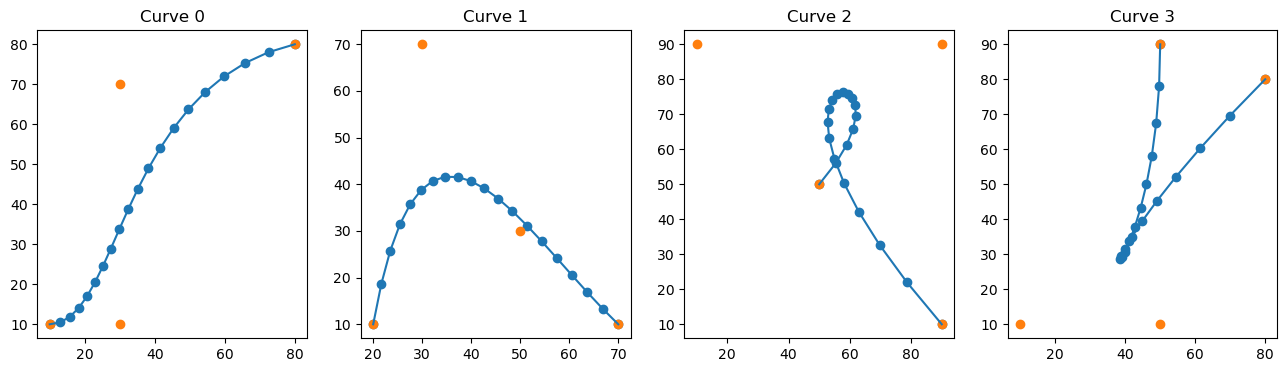

In [30]:
curve_control_points = [
    np.array([[10,10],[30,10],[30,70],[80,80]]),
    np.array([[70,10],[50,30],[30,70],[20,10]]),
    np.array([[50,50],[90,90],[10,90],[90,10]]),
    np.array([[50,90],[50,10],[10,10],[80,80]]),
]

curve_sample_points = [
    np.array([[10,      10     ], [22.34375, 19.53125], [33.75,    41.25   ], [50.78125, 64.84375], [80,      80.     ]]),
    np.array([[70,   10     ], [55.15625, 26.875  ], [41.25,    40.     ], [29.21875, 38.125  ], [20,      10.     ]]),
    np.array([[50,    50.   ], [61.875, 71.875], [55,    75.   ], [55.625, 55.625], [90,    10.   ]]),
    np.array([[50,      90.     ], [44.84375, 44.84375], [38.75,    28.75   ], [45.78125, 40.78125], [80,      80.     ]]),
]

##We have provided some ground truth answers
for i,P in enumerate(curve_control_points):
    t = np.reshape(np.linspace(0,1,5),(-1,1))
    sampled_bezier_points = cubic_bezier(t,P)
    print("Is curve",i,"sampled correctly?",np.allclose(sampled_bezier_points,curve_sample_points[i]))
##

##Here we visualise the curves
fig,ax = plt.subplots(1,len(curve_control_points),figsize=(16,4))
for i,P in enumerate(curve_control_points):
    t = np.reshape(np.linspace(0,1,20),(-1,1))
    sampled_bezier_points = cubic_bezier(t,P)
    ax[i].plot(sampled_bezier_points[:,0],sampled_bezier_points[:,1])
    ax[i].set_title("Curve "+str(i))
    ax[i].scatter(sampled_bezier_points[:,0],sampled_bezier_points[:,1])
    ax[i].scatter(P[:,0],P[:,1])
plt.show()

# Q1b Calculating the normalised tangent vector along a cubic Bezier curve (10 marks)

The tangent vector of a Bezier curve (and curves in general) describes the direction of the curve at a specific point. In other words, the gradient of the curve trajectory, $y$, with respect to the arc parameter, $t$.
\begin{align}
Y =& T\cdot B \cdot P\\
\frac{dY}{dt} =& \frac{dT}{dt} \cdot B \cdot P\\
\end{align}

This is very similar to Q1a, the key difference is that we need to differentiate the monomial basis matrix with respect to $t$.

Make sure to normalise the tangents prior to returning them!

In [31]:
def cubic_bezier_tangents(t,P):
    ## TASK - write your code here that samples a cubic Bezier
    ## t is an Mx1 array
    ## P is an Nx2 array
    ##Returns normalised_tangents - an Mx2 array

    B = np.array([
        [1, 0, 0, 0],
        [-3, 3, 0, 0],
        [3, -6, 3, 0],
        [-1, 3, -3, 1]
    ])

    # Monomial basis matrix
    # T = np.column_stack([np.ones_like(t), t, t**2, t**3])

     # Differentiate the monomial basis matrix
    dT_dt = np.column_stack([np.zeros_like(t), np.ones_like(t), 2*t, 3*t**2])

    # Calculate sampled points Y
    dY_dt = dT_dt @ B @ P

    #Normalise the tangent
    normalised_tangents = dY_dt / np.linalg.norm(dY_dt, axis=1, keepdims=True)

    return normalised_tangents

# Test your code!

Run this cell to test your code. You can do additional tests as well to be more certain about your implementation.

We have included a number of ground truth solutions that you can use to verify that your implementation is correct.

Is curve 0 sampled correctly? True
Is curve 1 sampled correctly? True
Is curve 2 sampled correctly? True
Is curve 3 sampled correctly? True


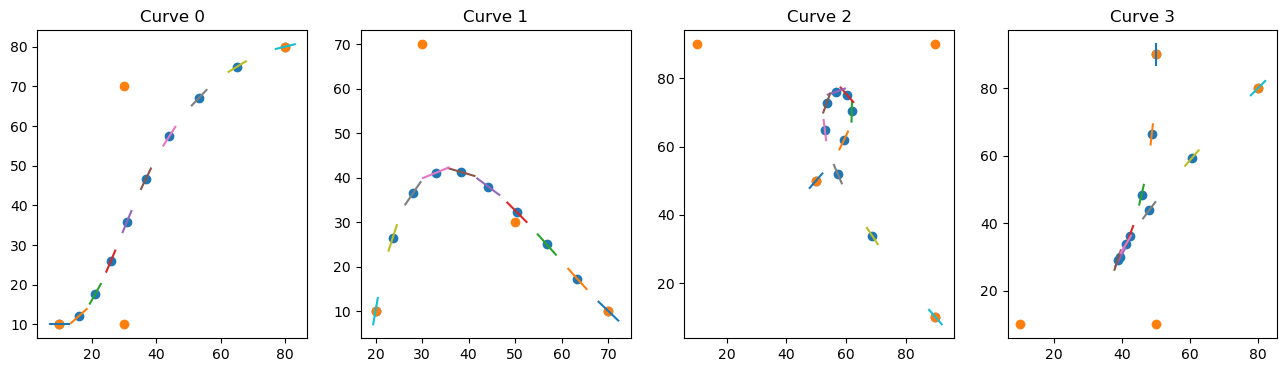

In [32]:
curve_control_points = [
    np.array([[10,10],[30,10],[30,70],[80,80]]),
    np.array([[70,10],[50,30],[30,70],[20,10]]),
    np.array([[50,50],[90,90],[10,90],[90,10]]),
    np.array([[50,90],[50,10],[10,10],[80,80]]),
]

curve_sampled_tangents = [
    np.array([[0.99999998, 0.        ], [0.52793411, 0.84928531], [0.47409982, 0.88047109], [0.722308,   0.69157149], [0.98058067, 0.19611613]]),
    np.array([[-0.70710677,  0.70710677], [-0.65252313,  0.75776879], [-0.86824313,  0.49613893], [-0.63473941, -0.77272624], [-0.16439899, -0.98639392]]),
    np.array([[ 0.70710678,  0.70710678], [-0.14142135,  0.98994947], [-0.70710676, -0.70710676], [ 0.3807498,  -0.92467809], [ 0.70710678, -0.70710678]]),
    np.array([[ 0,         -1.        ], [-0.25302774, -0.96745902], [-0.70710671, -0.70710671], [ 0.57842877,  0.81573288], [ 0.70710678,  0.70710678]]),
]

for i,P in enumerate(curve_control_points):
    t = np.reshape(np.linspace(0,1,5),(-1,1))
    sampled_bezier_points = cubic_bezier(t,P)
    sampled_tangent_vectors = cubic_bezier_tangents(t,P)
    print("Is curve",i,"sampled correctly?",np.allclose(sampled_tangent_vectors,curve_sampled_tangents[i]))


line_length = 3
fig,ax = plt.subplots(1,len(curve_control_points),figsize=(16,4))
for i,P in enumerate(curve_control_points):
    t = np.reshape(np.linspace(0,1,10),(-1,1))

    sampled_bezier_points = cubic_bezier(t,P)
    sampled_tangent_vectors = cubic_bezier_tangents(t,P)
    ax[i].scatter(sampled_bezier_points[:,0],sampled_bezier_points[:,1])
    #for j in range(sampled_bezier_points.shape[0]):
    x = [sampled_bezier_points[:,0]-line_length*sampled_tangent_vectors[:,0],sampled_bezier_points[:,0]+line_length*sampled_tangent_vectors[:,0]]
    y = [sampled_bezier_points[:,1]-line_length*sampled_tangent_vectors[:,1],sampled_bezier_points[:,1]+line_length*sampled_tangent_vectors[:,1]]
    ax[i].set_title("Curve "+str(i))
    ax[i].plot(x,y)
    ax[i].scatter(P[:,0],P[:,1])
plt.show()

# Q1d Sampling Bezier Curves using De Casteljau's algorithm (10 marks)
Sampling Bezier curves in matrix form requires computing the Bernstein matrix. This can be computationally challenging for high-order Bezier curves. An alternative method is to use De Casteljau's algorithm which negates the need to calculate the Bernstein matrix.

De Casteljau's algorithm for a curve of order, $K$, is desribed by the following equations:
\begin{align}
  y =& \beta^{K-1}_0\\
  \beta^L_i =& (1-t) \beta^{L-1}_i + t \beta^{L-1}_{i+1}\\
  \beta^0_i =& P_i
\end{align}
$y$ is the sampled points and $\beta$ are the intermediate points.

Here are some examples for $\beta$:
\begin{align}
  \beta^4_0 = (1-t) \beta^3_0 + t \beta^3_1\\
  \beta^1_2 = (1-t) \beta^0_2 + t \beta^0_3\\
\end{align}

For this task you must implement de Casteljau's algorithm. The function signature is similar to Q1a, however, this time it can receive an arbitrary number of control points.

Sucessfully implementing the algorithm scores 10 marks.

In [33]:
def bezier_decasteljau(t,P,L=None):
    if L is None:
      L = P.shape[0]-1
  ## TASK - implement de Cateljau's algorithm here
  ## t is an Mx1 array
  ## P is an Nx2 array
  ## L is a scalar value representing at which level you want to stop the calculation (i.e. the superscript index for beta). E.g. L=2 will return the values for \beta^2
  ## Returns beta - an (N-L)x2xM array
  ## Hint: This is 4 lines or less if you use vectorisation
    beta = np.zeros((P.shape[0]-L,2,t.shape[0]))
    t = np.transpose(np.expand_dims(t, axis=0),(0,2,1)) 
    beta = np.expand_dims(P, axis=-1) 
    for i in range(L): 
      beta = np.add(np.multiply((1-t),beta[:-1,:]), np.multiply(t,beta[1:,:]))
    return beta
  

# Test your code!

Run this cell to test your code. You can do additional tests as well to be more certain about your implementation.

We have included a number of ground truth solutions that you can use to verify that your implementation is correct.

The plots demonstrates De Casteljau's algorithm graphically. It samples a Bezier curve by recursively interpolating between the values of $\beta$ at each level. The blue line is the original set of points (i.e. $\beta^0$), the orange ones are $\beta^1$, the green line follows $\beta^2$ and the red dot is $\beta^4_0$.

Is curve 0 sampled correctly? True
Is curve 1 sampled correctly? True
Is curve 2 sampled correctly? True
Is curve 3 sampled correctly? True


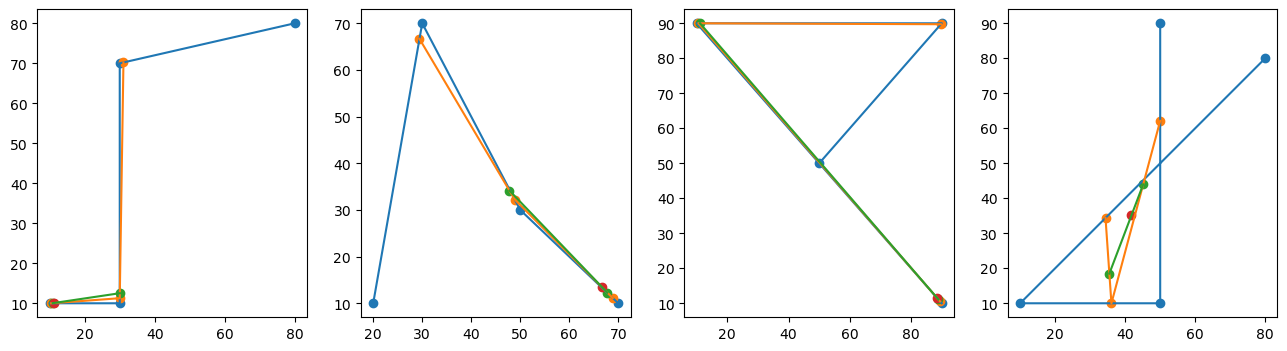

In [34]:
curve_control_points = [
    np.array([[10,10],[30,10],[30,70],[80,80]]),
    np.array([[70,10],[50,30],[30,70],[20,10]]),
    np.array([[50,50],[90,90],[10,90],[90,10]]),
    np.array([[50,90],[50,10],[10,10],[80,80]]),
]

curve_sample_points = [
    np.array([[10,      10     ], [22.34375, 19.53125], [33.75,    41.25   ], [50.78125, 64.84375], [80,      80.     ]]),
    np.array([[70,   10     ], [55.15625, 26.875  ], [41.25,    40.     ], [29.21875, 38.125  ], [20,      10.     ]]),
    np.array([[50,    50.   ], [61.875, 71.875], [55,    75.   ], [55.625, 55.625], [90,    10.   ]]),
    np.array([[50,      90.     ], [44.84375, 44.84375], [38.75,    28.75   ], [45.78125, 40.78125], [80,      80.     ]]),
]

for i,P in enumerate(curve_control_points):
    t = np.reshape(np.linspace(0,1,5),(-1,1))
    sampled_bezier_points = bezier_decasteljau(t,P)[0,...].T
    print("Is curve",i,"sampled correctly?",np.allclose(sampled_bezier_points,curve_sample_points[i]))

fig,ax = plt.subplots(1,len(curve_control_points),figsize=(16,4))
for i,P in enumerate(curve_control_points):
    t = np.random.random((1,1))
    for j in range(4):
        sampled_bezier_points = bezier_decasteljau(t,P,L=j)
        ax[i].plot(sampled_bezier_points[:,0],sampled_bezier_points[:,1])
        ax[i].scatter(sampled_bezier_points[:,0],sampled_bezier_points[:,1])
plt.show()

# Q1c Calculating the shortest distance from a point to a cubic Bezier curve (40 marks)

Often you'll need to determine the shortest distance to a curve so that's what we're going to do.

In this task you will need to find the shortest distance from a point, $x$, and a curve, $y(t)$. The curve is a cubic Bezier, $y$ is a function of the arc parameter, $t$, and is defined by a 4 control points, $P$.

The shortest distance between a point and a curve is found by finding the arc parameter value, $t$, that minimises the following equation:
\begin{align}
    argmin_t~~D(t) = ||x-y(t)||^2 = (x-y(t))\cdot(x-y(t))
\end{align}
In order to minimise this equation we must find the roots of it's derivative.

For the first part of this question you have to determine the derivative of $D(t)$ with respect to $t$ (e.g. using pen and paper) and then write some code that calculates it's value.

The second part involves finding the shortest distance between a point and a cubic Bezier curve. You are tasked with writing an iterative numerical solver that uses the Secant method (also known as Broyden's method) to find a root of the derivative of the distance function, $\frac{d~D(t)}{dt}$. Given some interval, $[t_l,t_u]$, that contains a root of the function, $f(t) = \frac{d~D(t)}{dt}$, we can estimate a new value, $t_{new}$ for where the root may exist:
\begin{align}
    t_{new} = \frac{f(t_l)}{f(t_l)-f(t_u)}(t_u-t_l)+t_l
\end{align}

After obtaining $t_{new}$ we have to adjust the interval by replacing either $t_u$ or $t_l$ with $t_{new}$. We can do this by sampling the derivative function and then comparing to the values for $t_u$ and $t_l$.

We repeat this process multiple times until we are sufficiently close to the root. We stop the search when $|f(t_{new})| < 0.000001$. After finding the root, we must clamp it to the range $[0,1]$ as we do not care about points that are beyond the Bezier curve.

There are a few tricks that can be used to speed up the process. Before applying the Secant method you should do a coarse search over the curve to find a smaller interval to search within. During this coarse search you may find that the closest point on the curve is one of its end points, in this case you can skip the iterative search.

In [35]:
def distance_to_point(x,t,P):
    #TASK - Calculate the squared distance from sampled points on a cubic Bezier curve to the queried point (10 marks)
    # x is an 1x2 array representing the query point
    # t is an Mx1 array representing the arc parameters
    # P is an 4x2 array representing the Bezier control points
    #Returns dist - an array of length M that gives the distance between the query point and the point on the curve corresponding to each arc parameter in t
    dist = np.zeros((t.shape[0],))
    for i in range(t.shape[0]):
        diff = x-(cubic_bezier(t[i],P))
        dist[i] = np.sum(diff**2)
    return dist

def distance_to_point_derivative(x,t,P):
    #TASK - Calculate the derivative of the distance function (10 marks)
    # x is an 1x2 array representing the query point
    # t is an Mx1 array representing the arc parameters
    # P is an 4x2 array representing the Bezier control points
    #Returns derivative - an array of length M that gives the derivative of the distance function for each arc parameter in t
    # print(f"x: {x}")
    print(f"tvalue: {t}")
    # print(f"P: {P}")
    # print(cubic_bezier(t,P), cubic_bezier_tangents(t,P).T)
    derivative = -2* np.dot((x-cubic_bezier(t,P)), cubic_bezier_tangents(t,P).T)
    # print(f"derivative: {derivative}")
    return derivative

def shortest_distance_to_curve(x,P):
    #TASK - Implement a numerical optimiser to find the shortest distance between the cubic Bezier curve and a queried point (20 marks)
    #x is an 1x2 array representing the query point
    #P is an 4x2 array representing the Bezier control points
    #Returns distance - a scalar value representing the shortest distance between the query point and the Bezier curve

    #Step 1 - Check arc parameter coarsely, use 10 linearly spaced points (i.e np.linspace(0,1,10))
    coarse_t = np.linspace(0,1,10) 
    guesses  =  distance_to_point(x,coarse_t,P)
    init_guess = coarse_t[np.argmin(guesses)]
    if 

    #Step 2 - Create initial upper and lower bounds using coarse search
    lower_bound = init_guess-0.1
    upper_bound = init_guess+0.1
    
    
    #Step 3 - Calculate derivative values and check if interval contains root
    upper_bound_value = distance_to_point_derivative(x,upper_bound,P)
    lower_bound_value = distance_to_point_derivative(x,lower_bound,P)
    print(f"upper_bound_value: {upper_bound_value}")
    print(f"lower_bound_value: {lower_bound_value}")

    
    #Step 4 - Find the root of the derivative!
    #Get the values of the derivative at the upper and lower bounds
    #Use the Secant method to estimate where the root of the derivative exists (i.e. the point on the curve that closest to the query point)
    #Calculate the derivative at the upper and lower bounds
    #Estimate the root using the Secant method
    #Check the derivative at the estimated root
    #If the absolute value of the derivative is less than 1e-6 then we can exit, if not then we need to re-iterate
    #Replace either the upper or lower bound with the new value depending on the sign of the derivative
    root_found = False
    while not root_found:
        t_new = ((lower_bound_value / (lower_bound_value - upper_bound_value)) * (upper_bound - lower_bound))+ lower_bound
        # print(f"t_new: {t_new}")
        t_new_value = distance_to_point_derivative(x,t_new,P)
        # print(np.abs(t_new_value))
        if np.abs(t_new_value) < 1e-6:  
            # print("The root has been found.")
            root_found = True
        else:
            # print("The root has not been found.")
            if np.sign(t_new_value) != np.sign(upper_bound_value):
                lower_bound = t_new
                lower_bound_value = t_new_value
            else:
                upper_bound = t_new
                upper_bound_value = t_new_value
            
    
    print(f"t_new: {t_new}")     
    #Step 5 - Sanitise solved root, make sure the value is between 0 and 1!
    t_closest = np.clip(t_new,0,1)
    
    
    #Step 6 - Calculate distance
    print("t_closest", t_closest)
    distance = np.sqrt(distance_to_point(x,t_closest,P))
    return distance[0]

# Test your code!

Run this cell to test your code. You can do additional tests as well to be more certain about your implementation.

We have included a number of ground truth solutions that you can use to verify that your implementation is correct.

In [36]:
curve_control_points = [
    np.array([[10,10],[30,10],[30,70],[80,80]]),
    np.array([[70,10],[50,30],[30,70],[20,10]]),
    np.array([[50,50],[90,90],[10,90],[90,10]]),
]

test_points = [
    np.array([[27,25]]),
    np.array([[30,50]]),
    np.array([[43,77]]),
    np.array([[88,63]]),
    np.array([[10,93]]),
    np.array([[15,85]]),
    np.array([[20,65]]),
    np.array([[25,75]]),
    np.array([[30,15]]),
    np.array([[15,75]])
]

ground_truth_distances = [
    [1.3804113519252021, 7.551952618533779, 14.21198733622006, 18.788294228055936, 48.97339826306313, 39.96758283169489, 23.9814817876366, 25.88734263646652, 8.89482212532327, 33.80377985909253],
    [3.5922228632791366, 9.355456489178053, 35.90888742361384, 48.52757110901156, 56.742426136479146, 47.42173270664112, 27.154183047592046, 34.72094623092011, 8.921150307913496, 38.33377180340012],
    [33.97057550292606, 20.0, 11.381175393633573, 26.783756919621915, 48.026852871092984, 40.4331230592964, 32.8112016263819, 28.292909880549104, 40.311288741492746, 38.18685364194293]
]

for i,P in enumerate(curve_control_points):
    distances = []
    for j,x in enumerate(test_points):
        distances.append(shortest_distance_to_curve(x,P))
    print("Are the distances for curve",i,"correct?",np.all(np.abs(np.array(distances)-np.array(ground_truth_distances[i]))<1e-3))


tvalue: 0.43333333333333335
tvalue: 0.2333333333333333
upper_bound_value: [[20.67651819]]
lower_bound_value: [[-16.93402058]]
tvalue: [[0.32338267]]
tvalue: [[0.32950349]]
tvalue: [[0.32985877]]
tvalue: [[0.32987919]]
tvalue: [[0.32988036]]
tvalue: [[0.32988043]]
t_new: [[0.32988043]]
t_closest [[0.32988043]]
tvalue: 0.6555555555555556
tvalue: 0.4555555555555556
upper_bound_value: [[26.19414219]]
lower_bound_value: [[-21.85333912]]
tvalue: [[0.54652115]]
tvalue: [[0.55019283]]
tvalue: [[0.5503172]]
tvalue: [[0.55032138]]
tvalue: [[0.55032152]]
tvalue: [[0.55032152]]
t_new: [[0.55032152]]
t_closest [[0.55032152]]
tvalue: 0.8777777777777777
tvalue: 0.6777777777777777
upper_bound_value: [[34.18438914]]
lower_bound_value: [[-26.40539625]]
tvalue: [[0.76493899]]
tvalue: [[0.76843863]]
tvalue: [[0.7685572]]
tvalue: [[0.76856118]]
tvalue: [[0.76856132]]
tvalue: [[0.76856132]]
t_new: [[0.76856132]]
t_closest [[0.76856132]]
tvalue: 1.1
tvalue: 0.9
upper_bound_value: [[16.4707718]]
lower_bound_v

# Q2a Representing 3D objects using implicit functions (20 marks)

The second half of the notebook will focus on implicit surfaces. You are tasked with writing code the calculates the values for an implicit sphere and implicit cube.

We have broken this question into a number of tasks:


1.   Calculate a 3D rotation matrix (5 marks)
2.   Convert "world" space coordinates into "local" space, this simplifies calculating the implicit function values (5 marks)
3.   Compute the implicit function and it's gradient for an implicit sphere (5 marks)
4.   Compute the implicit function and it's gradient for an implicit cube (5 marks)
5.   Convert the gradient from "local" space into "world" space (included in task 2)

Use the following equation to calculate the rotation matrix from a set of rotation angles, $[\gamma,\beta,\alpha]$:
\begin{align} \\
  R = R_z(\gamma) \, R_y(\beta) \, R_x(\alpha) &= \begin{bmatrix}
    \cos \gamma & -\sin \gamma & 0 \\
    \sin \gamma &  \cos \gamma & 0 \\
     0          &   0          & 1 \\
  \end{bmatrix}\begin{bmatrix}
    \cos \beta & 0 & \sin \beta \\
     0         & 1 &  0 \\
   -\sin \beta & 0 & \cos \beta \\
  \end{bmatrix}\begin{bmatrix}
    1 &  0          &   0 \\
    0 & \cos \alpha & -\sin \alpha \\
    0 & \sin \alpha &  \cos \alpha \\
  \end{bmatrix} \\
  &= \begin{bmatrix}
    \cos\beta\cos\gamma & \sin\alpha\sin\beta\cos\gamma - \cos\alpha\sin\gamma & \cos\alpha\sin\beta\cos\gamma + \sin\alpha\sin\gamma \\
    \cos\beta\sin\gamma & \sin\alpha\sin\beta\sin\gamma + \cos\alpha\cos\gamma & \cos\alpha\sin\beta\sin\gamma - \sin\alpha\cos\gamma \\
    -\sin\beta          & \sin\alpha\cos\beta                                  & \cos\alpha\cos\beta \\
  \end{bmatrix}
\end{align}
An inverse rotation is just taken as the transpose of the rotation matrix, $R^T$.

The following equation describes how to convert from "world" space to "local" space of an implicit shape with a position, $P$, rotation, $R$, and scale, $S = [S_x,S_y,S_z]$:
\begin{align}
    X_{local} = (X-P)R\odot (1/S)
\end{align}
The $\odot$ indicates the Hadamard product or element-wise multiplication.

Use the following function for an implicit sphere, $F_{sphere}$, and it's gradient vector function, $\nabla F_{sphere}$:
\begin{align}
    F_{sphere}(X) =& ||X||-1\\
    =& \sqrt{x^2+y^2+z^2} - 1\\
    \nabla F_{sphere}(X) =& [\frac{d F_{sphere}(X)}{dx},\frac{d F_{sphere}(X)}{dy},\frac{d F_{sphere}(X)}{dz},]
\end{align}

Use the following function for an implicit cube, $F_{cube}$, and it's gradient vector function, $\nabla F_{cube}$:
\begin{align}
    F_{cube}(X) =& max(abs(X))-1\\
    \nabla F_{cube}(X) =& [\frac{d F_{cube}(X)}{dx},\frac{d F_{cube}(X)}{dy},\frac{d F_{cube}(X)}{dz},]
\end{align}


In [37]:
## The ''ImplicitShape'' class is a base class for all implicit shapes that we will be working with
## The ''sample_impl'' methods needs to be overridden in each of implicit shape class
## For example, the ImplicitSphere class requires it's own implementation of ''sample_impl''.
## NOTE: The self variable refers to the object (as in object oriented programming), you can use it to access the fields of the object from within a function. It's analogous to "this" in C++.
class ImplicitShape():
    def __init__(self,location,scale,rotation_angles,colour):
        self.location = location #N,3 numpy array
        self.scale = scale #1,3 numpy array representing the scales along each axis - [S_x,S_y,S_z]
        self.rotation = self.calc_rotation_matrix(rotation_angles) #3,3 numpy array computed from rotation_angles which contains the angles for [gamma, beta, alpha]
        self.colour = colour #1,3 numpy array, RGB

    def calc_rotation_matrix(self,rotation):
        ##TASK - Compute a 3D rotation matrix from the rotation vector (5 marks)
        #rotation - a 3 element numpy array in the format [gamma, beta, alpha] (see the equation above)
        #Returns rotation_matrix - a 3x3 numpy array
        R_Z_gamma = np.array([[np.cos(rotation[0]), -np.sin(rotation[0]), 0],
                              [np.sin(rotation[0]), np.cos(rotation[0]), 0],
                              [0, 0, 1]])
        R_Y_beta = np.array([[np.cos(rotation[1]), 0, np.sin(rotation[1])],
                                [0, 1, 0],
                                [-np.sin(rotation[1]), 0, np.cos(rotation[1])]])
        R_X_alpha = np.array([[1, 0, 0],
                                [0, np.cos(rotation[2]), -np.sin(rotation[2])],
                                [0, np.sin(rotation[2]), np.cos(rotation[2])]])
        rotation_matrix = R_Z_gamma @ R_Y_beta @ R_X_alpha

        return rotation_matrix

    def sample_impl(self,p):
        ## This function will be overriden in the child-classes, don't edit it here!
        return np.zeros_like(p[:,0:1]),p

    def sample(self,X):
        #X - an Nx3 numpy array
        #Returns (dist, rotated_gradient_vector) - dist is a Nx1 array, rotated_gradient_vector is a Nx3 array
        ##TASK - Convert world space coordinates into the object's local space (5 marks)
        local_space_coordinates = np.multiply((X-self.location) @ self.rotation , (1/self.scale))
        ##
        values, gradients = self.sample_impl(local_space_coordinates)
        #TASK - Apply the inverse rotation to the gradient vector (Marks included in converting from world space to local space)
        rotated_gradient_vector = gradients @ self.rotation.T
        ##
        return values, rotated_gradient_vector

class ImplicitSphere(ImplicitShape):
  def sample_impl(self,X):
        ##TASK - Use the local space coordinates to calculate the implicit function value and the gradient vector for an implicit sphere of radius 1, use the above equations. (5 marks)
        ## X - a Nx3 array of points in 3D space
        ## Returns (function_vals, gradient_vectors) - function_vals is a Nx1 array representing the implicit functions value for each point - gradient_vector is a Nx3 array representing the gradient vector for each point
        function_vals = np.sqrt(np.sum(np.power(X,2), axis=1, keepdims=True)) - 1
        gradient_vector = np.array([X[:,0]/np.sqrt(np.sum(np.power(X,2), axis=1, keepdims=False)[0]), 
                                    X[:,1]/np.sqrt(np.sum(np.power(X,2), axis=1, keepdims=False)[0]), 
                                    X[:,2]/np.sqrt(np.sum(np.power(X,2), axis=1, keepdims=False)[0])]).T
        # gradient_vector = X / np.sqrt(np.sum(np.power(X,2), axis=1, keepdims=True))
        return function_vals, gradient_vector

class ImplicitCube(ImplicitShape):
    def sample_impl(self,X):
        ##TASK - Use the local space coordinates to calculate the implicit function value and the gradient vector for an implicit cube of size 1, use the above equations. (5 marks)
        ## X - a Nx3 array of points in 3D space
        ## Returns (function_vals, gradient_vectors) - function_vals is a Nx1 array representing the implicit functions value for each point - gradient_vector is a Nx3 array representing the gradient vector for each point
        function_vals = np.max(np.abs(X), axis=1, keepdims=True) - 1
        gradient_vector = np.zeros_like(X)
        for row in range(gradient_vector.shape[0]):
            max_pos = np.argmax(np.abs(row))
            if max_pos == 0:
                gradient_vector[row, 0] = 1
                gradient_vector[row, 1] = X[row,1]
                gradient_vector[row, 2] = X[row,2]
            elif max_pos == 1:
                gradient_vector[row, 0] = X[row,0]
                gradient_vector[row, 1] = 1
                gradient_vector[row, 2] = X[row,2]
            elif max_pos == 2:
                gradient_vector[row, 0] = X[row,0]
                gradient_vector[row, 1] =  X[row,1]
                gradient_vector[row, 2] = 1
            
        return function_vals, gradient_vector

# Test your code

Here are a number of tests that check if you completed each of the tasks correctly.

In [38]:
print("Shape")
test_shape = ImplicitShape(np.zeros(3),np.ones(3),np.array([0.3,0.2,0.1]),np.zeros(3))
ground_truth_rotation = np.array([[ 0.93629336, -0.27509585,  0.21835066],
 [ 0.28962948,  0.95642509, -0.03695701],
 [-0.19866933,  0.0978434,   0.97517033]])
print("Does the rotation matrix match the ground truth? ",np.allclose(ground_truth_rotation,test_shape.rotation))
###
test_shape = ImplicitShape(np.array([0.1,0.3,0.2]),np.array([[0.2,0.1,0.3]]),np.array([0.3,0.2,0.1]),np.zeros(3))
test_points = [
    np.array([[-0.5,-0.7,-0.9]]),
    np.array([[0.25,0.35,0.45]]),
    np.array([[0.5,0.7,0.9]]),
    np.array([[-0.25,0.35,-0.45]]),
    np.array([[0.25,-0.7,-0.45]]),
]

ground_truth_vectors = [
    np.array([[-1.33885292, -9.37097376, -4.04351884,]]),
    np.array([[0.60736852, 0.41525064, 0.81871326,]]),
    np.array([[1.256109,   3.67732545, 2.43945729,]]),
    np.array([[-1.60157791,  0.59112889, -2.05319929,]]),
    np.array([[  2.41508376, -10.10995965,  -2.85229426,]])
]


sampled_vectors = []
for X in test_points:
    sampled_vectors.append(test_shape.sample(X)[1])
print("Are sampled gradient vectors the same as ground truth?",np.allclose(sampled_vectors,ground_truth_vectors))

Shape
Does the rotation matrix match the ground truth?  True
Are sampled gradient vectors the same as ground truth? True


In [39]:
###
print("ImplicitSphere")
test_shape = ImplicitSphere(np.array([[-0.25,-0.25,0.55]]),np.array([[0.75,0.5,0.25]]),np.array([1/np.sqrt(2),1/np.sqrt(2),0]),np.array([[1,1,0]]))
test_points = [
    np.array([[-0.5,-0.7,-0.9]]),
    np.array([[0.25,0.35,0.45]]),
    np.array([[0.5,0.7,0.9]]),
    np.array([[-0.25,0.35,-0.45]]),
    np.array([[0.25,-0.7,-0.45]]),
]

ground_truth_values = [4.725946616077288, 0.92327392563805, 3.2721916167581586, 1.5566321460449486, 2.2563361046285864]
ground_truth_vectors = [
    np.array([-0.37025557, -0.3989491 , -0.83889813]),
    np.array([0.60749688, 0.6987486 , 0.37775242]),
    np.array([0.53006325, 0.59765586, 0.60153134]),
    np.array([-0.33846068,  0.1801493 , -0.92357448]),
    np.array([ 0.00901549, -0.5310951 , -0.84726389])
]
sampled_values = []
sampled_vectors = []
for X in test_points:
    print("X before")
    print(X)
    sample = test_shape.sample(X)
    sampled_values.append(sample[0][0,0])
    sampled_vectors.append(sample[1][0,:])
print("Do the implicit function values from the ImplicitSphere object match the ground truth?", np.allclose(sampled_values,ground_truth_values))
print("Do the implicit function gradient vector values from the ImplicitSphere object match the ground truth?", np.allclose(sampled_vectors,ground_truth_vectors))

ImplicitSphere
X before
[[-0.5 -0.7 -0.9]]
X before
[[0.25 0.35 0.45]]
X before
[[0.5 0.7 0.9]]
X before
[[-0.25  0.35 -0.45]]
X before
[[ 0.25 -0.7  -0.45]]
Do the implicit function values from the ImplicitSphere object match the ground truth? True
Do the implicit function gradient vector values from the ImplicitSphere object match the ground truth? True


In [40]:
###
print("ImplicitCube")
test_shape = ImplicitCube(np.array([[-0.25,-0.25,0.55]]),np.array([[0.75,0.5,0.25]]),np.array([1/np.sqrt(2),1/np.sqrt(2),0]),np.array([[1,1,0]]))
test_points = [
    np.array([[-0.5,-0.7,-0.9]]),
    np.array([[0.25,0.35,0.45]]),
    np.array([[0.5,0.7,0.9]]),
    np.array([[-0.25,0.35,-0.45]]),
    np.array([[0.25,-0.7,-0.45]]),
]

ground_truth_values = [4.662952310746186, 0.6965356734440336, 3.1496983348407737, 1.0281108220209703, 1.8128631170209482]
ground_truth_vectors = [
    np.array([-0.49388297, -0.42202815, -0.7602446 ]),
    np.array([0.49388297, 0.42202815, 0.7602446 ]),
    np.array([0.49388297, 0.42202815, 0.7602446 ]),
    np.array([-0.49388297, -0.42202815, -0.7602446 ]),
    np.array([-0.49388297, -0.42202815, -0.7602446 ])
]
sampled_values = []
sampled_vectors = []
for X in test_points:
    sample = test_shape.sample(X)
    sampled_values.append(sample[0][0,0])
    sampled_vectors.append(sample[1][0,:])
print("Do the implicit function values from the ImplicitCube object match the ground truth?", np.allclose(sampled_values,ground_truth_values))
print("Do the implicit function gradient vector values from the ImplicitCube object match the ground truth?", np.allclose(sampled_vectors,ground_truth_vectors))

ImplicitCube
Do the implicit function values from the ImplicitCube object match the ground truth? True
Do the implicit function gradient vector values from the ImplicitCube object match the ground truth? False


# Q2b Applying lighting to 3D objects (10 marks)

By computing a normal map we can easily apply shading to the diffuse map so it adds some depth to it.

Lambertian shading produces a shaded map, $C$, from the normal map, $N$, light direction, $L$, and the diffuse map, $C_D$. The following equation describes the method:
\begin{align}
    C = C_D \odot max(min((N\cdot L),1),0)
\end{align}

In [41]:
def apply_lambertian_shading(light_vector,diffuse_map,normal_map):
    ##TASK - Implement Lambertian shading here
    ## light_vector is a 3 element array representing the direction and strength of the light
    ## diffuse_map is a HxWx3 numpy array representing the diffuse map from some renderer
    ## normal_map is a HxWx3 numpy array representing the normal map from some renderer
    ## Returns - shaded_output - a HxWx3 numpy array
    shaded_output = diffuse_map * np.max(np.min(np.dot(normal_map, light_vector), 1), 0)
    #shaded_output = diffuse_map * np.clip(np.sum(normal_map * light_vector, axis=2, keepdims=True), 0, 1)
    ##
    return shaded_output

test_lights = [
    np.array([ 0.62178587,  0.26274321, -0.73779865]),
    np.array([ 0.56553381,  0.32635988, -0.75740295]),
    np.array([ 0.09747381,  0.58710638, -0.80361891]),
    np.array([ 0.05533719,  0.26836935, -0.96172437]),
    np.array([ 0.43513414,  0.63078733, -0.64246739]),
]

test_diffuse = np.array([[[0.5,  1.,   0.25],
  [0.5,  1.,   0.25]],

 [[0.5,  1.,   0.25],
  [0.5,  1.,   0.25]]])


test_normals = np.array([[[ 0.05396848, -0.65815722, -0.75094372],
  [ 0.05396848, -0.65815722, -0.75094372]],
 [[ 0.05396848, -0.65815722, -0.75094372],
  [ 0.05396848, -0.65815722, -0.75094372]]])

ground_truths = [
    np.array([[[0.20733788, 0.41467576, 0.10366894],
  [0.20733788, 0.41467576, 0.10366894]],
 [[0.20733788, 0.41467576, 0.10366894],
  [0.20733788, 0.41467576, 0.10366894]]]),
    np.array([[[0.19224594, 0.38449188, 0.09612297],
  [0.19224594, 0.38449188, 0.09612297]],
 [[0.19224594, 0.38449188, 0.09612297],
  [0.19224594, 0.38449188, 0.09612297]]]),
    np.array([[[0.11116239, 0.22232479, 0.0555812 ],
  [0.11116239, 0.22232479, 0.0555812 ]],
 [[0.11116239, 0.22232479, 0.0555812 ],
  [0.11116239, 0.22232479, 0.0555812 ]]]),
    np.array([[[0.27427906, 0.54855812, 0.13713953],
  [0.27427906, 0.54855812, 0.13713953]],
 [[0.27427906, 0.54855812, 0.13713953],
  [0.27427906, 0.54855812, 0.13713953]]]),
    np.array([[[0.04539157, 0.09078315, 0.02269579],
  [0.04539157, 0.09078315, 0.02269579]],
 [[0.04539157, 0.09078315, 0.02269579],
  [0.04539157, 0.09078315, 0.02269579]]]),
]

test_passed = []
for L,GT in zip(test_lights,ground_truths):
    test_passed.append(np.allclose(apply_lambertian_shading(L,test_diffuse,test_normals),GT))
print("Did all tests pass?",np.all(test_passed))

Did all tests pass? True


# Rendering Bezier Curves using distance fields (self-assessed)

Note: This question is self-assessed and does not contribute to the marks of the notebook

So far we have rendered Bezier curves by sampling many points along the curve and plotting them. An alternative way to render them is to use distance fields; for each point of the canvas we determine the distance to the Bezier curve and check if that distance is less than the width of the line we want to draw.

We have included a simple renderer computes the distance field for a set of Bezier curves, you can stylise the output by changing the ''field function''. We have given a few examples of field functions but you are free to experiment.

In [42]:
# ##COMMENT THIS OUT PRIOR TO SUBMITTING TO PREVENT TIMOUTS!

# #Define some bezier curves
# curve_control_points = [
#     np.array([[10,50],[30,10],[30,70],[80,80]]),
#     np.array([[20,70],[50,30],[30,70],[90,30]]),
#     np.array([[50,90],[50,10],[10,10],[80,20]]),
# ]

# #define canvas parameters
# resolution = 250 #Increase this for higher quality renders, but will be slower!
# canvas_u = np.linspace(0,100,resolution)
# canvas_v = np.linspace(0,100,resolution)

# #initialise array for distance fields
# curve_distance_fields = np.zeros((resolution,resolution,len(curve_control_points)))

# #for each curve
# for i,control_points in enumerate(curve_control_points):
#     print(f"Progress: {i/len(curve_control_points)}")
#     #for each point in the canvas
#     for y,u in enumerate(canvas_u):
#         for x,v in enumerate(canvas_v):
#             P = np.array([[u,v]])
#             #calculate the shortest distance from the point in the canvas to the curve
#             curve_distance_fields[y,x,i] = shortest_distance_to_curve(P,control_points)

# ## Note: We don't normally do it like this as it's quite slow. It's been implemented it like this to demonstrate the point.
# ## In practice a lot of optimisations are used to make this run faster, that would obviously make the code much longer and somewhat opaque

# Render the distance field

By separating the computation and rendering of the distance field we can save a lot of time. We've included a few examples of how distance fields can be rendered to produce different stylistic effects.

In [43]:
# ##COMMENT THIS OUT PRIOR TO SUBMITTING TO PREVENT TIMOUTS!

# line_width = 10 #desired line width


# signed_distance_field = line_width/2 - np.min(curve_distance_fields,-1) #Positive value means inside the bounds of the rendered line

# ## signed_distance_field = line_width/2 - 1/(np.mean(1/(curve_distance_fields+1e-6),-1)+1e-6) ## ALTERNATIVE SIGNED DISTANCE FIELD

# fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(40,40)) #create figures

# edge_hardness = 1 #desired "hardness" at edges, higher values creates higher sharper edges
# plain_lines = 1/(1 + np.exp(-edge_hardness*signed_distance_field)) #Use sigmoid function to render plain lines
# ax[0].imshow(plain_lines)

# omega = 3 #Adjust this to change the pattern!
# multi_lines = plain_lines*np.clip(np.cos(omega*signed_distance_field),0,1) #Use cosine to make geometric patterns
# ax[1].imshow(multi_lines)

# scalar = 0.5 #Adjust this to change the pattern!
# out_lines = plain_lines*np.exp(-signed_distance_field*scalar) #Use gaussian function to fade centre of lines
# ax[2].imshow(out_lines)

# plt.show()

# Rendering 3D objects using ray tracing (Self assessed)

We have included a naive implementation of a ray tracing renderer. You can use it to render implicit shapes. Run this cell to produce a diffuse (or colour) map, normal map and depth map from a set of ImplicitShape objects.

The output from the ray tracer is not shaded, so we use Lambertian shading to apply some lighting to the renders.

This section has been designed so you can easily make changes and play around with it. You can apply a lens distortion, change it from orthographic to perspective camera. You could use the depth along with a convolutional filter to blur objects that are far away. The possibilities are endless!

The way we have rendered the 3D scene is known as "deferred rendering". We compute all the individual components and then combine them at the end. This allows for complicated effects to be produced. You can apply filters to any of the components to create some very exotic rendering styles.

In [44]:
# ##COMMENT THIS OUT PRIOR TO SUBMITTING TO PREVENT TIMOUTS!

# def ray_trace(ray_density, shapes):
#     #Initialise arrays, we later reshape into a 2D image
#     diffuse_map = np.zeros((ray_density*ray_density,3))
#     normal_map = np.zeros((ray_density*ray_density,3))
#     depth_map = np.zeros((ray_density*ray_density,3))

#     #Setting up ray starting coordinate
#     u_points = np.linspace(-1,1,ray_density)
#     v_points = np.linspace(-1,1,ray_density)

#     u_idx = np.arange(0,ray_density)
#     v_idx = np.arange(0,ray_density)

#     u,v = np.meshgrid(u_points,v_points)
#     w = np.zeros_like(u)-1

#     U_idx, V_idx = np.meshgrid(u_idx,v_idx)

#     UV = np.stack([u,v,w],-1)

#     #Initalising rays
#     alive_rays = np.reshape(UV,(-1,3))
#     alive_rays_idx = np.arange(0,ray_density**2)

#     epsilon = (1/ray_density)**2
#     while True: #Stopping condition are assessed at the end of the loop
#         num_alive_rays = alive_rays.shape[0]
#         progress = 100*(1-num_alive_rays/(ray_density**2))

#         #Sample each object at each ray
#         walk_distances = np.ones((num_alive_rays,1))*10000
#         for shape in shapes:
#             values,gradient_vectors = shape.sample(alive_rays)
#             distances = values*(np.min(shape.scale)+1e-6) #We multiple the values by the smallest scale value to give a distance that the ray can be walked forward by
#             has_ray_hit = distances<epsilon
#             hit_ray_indices = alive_rays_idx[has_ray_hit[:,0]]
#             diffuse_map[hit_ray_indices] = shape.colour
#             normal_map[hit_ray_indices,:] = gradient_vectors[has_ray_hit[:,0],:]
#             depth_map[hit_ray_indices,:] = alive_rays[has_ray_hit[:,0],:]
#             still_alive = np.bitwise_not(has_ray_hit)[:,0]

#             num_alive_rays = np.sum(still_alive*1.0)
#             if num_alive_rays == 0:
#                 break

#             #We remove rays that have hit a surface to speed up rendering!
#             walk_distances = np.minimum(walk_distances,distances)#We want to keep the shortest walk distance for each ray. It is minimised over the set of shapes
#             walk_distances = walk_distances[still_alive,:]
#             alive_rays = alive_rays[still_alive,:]
#             alive_rays_idx = alive_rays_idx[still_alive]

#         if num_alive_rays == 0:
#             break

#         #We walk the rays forward by the smallest distance we observed in the implicit functions
#         alive_rays[:,2] += walk_distances[:,0]

#         #We remove rays that have hit the outer bounding box to speed up rendering!
#         is_ray_in_bounds = alive_rays[:,2]<1.0
#         walk_distances = walk_distances[is_ray_in_bounds,:]
#         alive_rays = alive_rays[is_ray_in_bounds,:]
#         alive_rays_idx = alive_rays_idx[is_ray_in_bounds]

#         num_alive_rays = np.sum(is_ray_in_bounds*1.0)
#         if num_alive_rays == 0:
#             break
#     diffuse_map = np.reshape(diffuse_map,(ray_density,ray_density,3))
#     normal_map = np.reshape(normal_map,(ray_density,ray_density,3))
#     depth_map = np.reshape(depth_map,(ray_density,ray_density,3))

#     return diffuse_map, normal_map,depth_map

# shapes = [
#     ImplicitSphere(np.array([[-0.25,-0.25,0.55]]),np.array([[0.75,0.5,0.25]]),np.array([1/np.sqrt(2),1/np.sqrt(2),0]),np.array([[1,1,0]])),
#     ImplicitSphere(np.array([[0.5,-0.5,0]]),np.array([[0.25,0.25,0.5]]),np.array([1/np.sqrt(2),1/np.sqrt(2),0]),np.array([[0.25,1,0.5]])),
#     ImplicitCube(np.array([[0.3,0.5,-0.25]]),np.array([[0.5,0.25,0.25]]),np.array([1/np.sqrt(2),1/np.sqrt(2),1/np.sqrt(2)]),np.array([[1,0.71,1]])),
#     ImplicitCube(np.array([[-0.3,0.3,0]]),np.array([[0.25,0.5,0.25]]),np.array([2/np.sqrt(2),1/np.sqrt(2),2/np.sqrt(2)]),np.array([[0.5,1,0.25]]))
# ]

# resolution = 100 #Increase this for better quality renders!
# diffuse_map, normal_map, depth_map = ray_trace(resolution,shapes)

# fig,ax = plt.subplots(1,3,figsize=(30,10))
# ax[0].set_title("Diffuse map")
# ax[0].imshow(diffuse_map)
# ax[1].set_title("Normal map")
# ax[1].imshow(0.5*(1+normal_map))
# ax[2].set_title("Depth map")
# ax[2].imshow(depth_map[:,:,2])
# plt.show()


# ##APPLY LIGHTING
# num_lights = 3
# fig,ax=plt.subplots(num_lights,num_lights,figsize=(20,20))
# print("Shaded outputs")
# for i in range(num_lights):
#     for j in range(num_lights):
#         light_vector = np.random.random((3,))
#         light_vector[2] = -1
#         light_vector = light_vector/(np.linalg.norm(light_vector)+1e-6)
#         shaded_output = apply_lambertian_shading(light_vector,diffuse_map,normal_map)
#         ax[i,j].imshow(shaded_output)
# plt.show()